True coefficients: [0. 0. 0. 0. 0.]
Non-zero indices: [1 4]
True coefficients: [0.         0.47386083 0.         0.         1.36845012]
X: [[-0.91682684 -0.12414718 -2.01096289 -0.49280342  0.39257975]
 [-0.92918467  0.07983181 -0.1595165   0.02222183 -0.42779291]
 [-0.53181741 -0.1174755   0.2220789  -0.7679765   0.1424646 ]
 [-0.03465218  1.13433927 -0.10474555 -0.52512285  1.91277127]
 [-2.02671962  1.11942361  0.77919263 -1.10109776  1.13022819]
 [ 0.37311891 -0.38647295 -1.15877024  0.56611283 -0.70445345]
 [-1.3779393  -0.35311665 -0.46146572  0.06665728 -0.17628566]
 [ 1.20089277  0.69839894 -0.17162884 -0.90718658  1.18862573]
 [ 0.78553212  2.65601009  0.26348604  1.64177112  0.4608163 ]
 [ 0.08592347 -1.50995728  0.72150246 -0.84341992 -0.51332541]
 [-0.0435368  -0.27530091 -1.56306679 -0.79563099  0.9305844 ]
 [ 0.67776741  0.69844026  0.17360206  0.66228451  0.24112216]
 [-0.16820509  1.16476865 -0.24574769 -0.76966777  1.21217234]
 [ 1.2334968  -1.57415529  0.63795294 -2.0

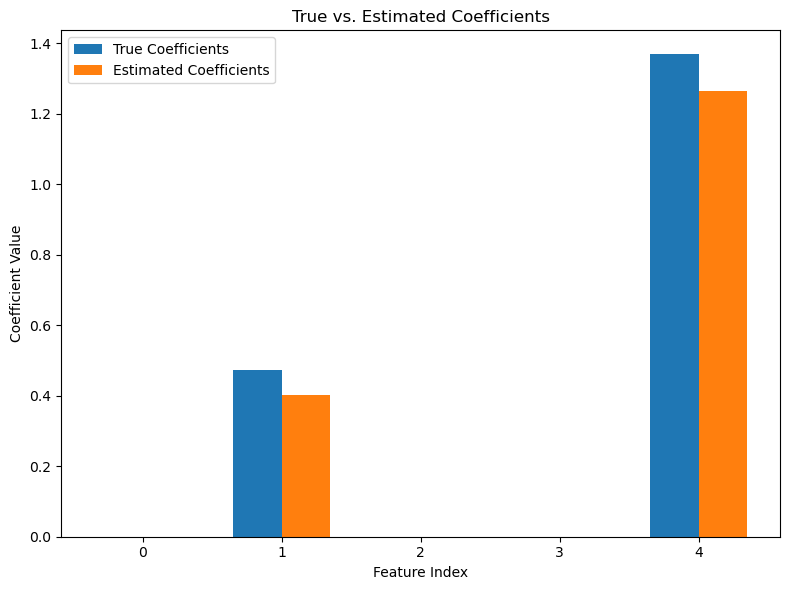

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples (observations)
n_samples = 50

# Number of features (basis functions)
n_features = 5

# Generate true coefficients with sparsity (only 2 non-zero coefficients)
true_coefs = np.zeros(n_features)
print("True coefficients:", true_coefs)

# Randomly choose indices to be non-zero
# range(n_features) : Creates a range of numbers from 0 to n_features - 1. This represents all possible indices (positions) in a vector (or array) of length n_features.
# size=2: Selects 2 random indices from this range. It means you want to pick two positions in the array to make them non-zero.
# replace=False: Ensures that you pick 2 unique indices. You cannot pick the same index twice.
non_zero_indices = np.random.choice(range(n_features), size=2, replace=False)
print("Non-zero indices:", non_zero_indices)

# Assign random values to those indices
true_coefs[non_zero_indices] = np.random.randn(2)
print("True coefficients:", true_coefs)

# Generate random feature matrix X
X = np.random.randn(n_samples, n_features)
print(f'X: {X}')

# Generate target variable y with some noise
noise = 0.1 * np.random.randn(n_samples)
y = X @ true_coefs + noise
print(f'y: {y}')

# Set regularization strength (alpha)
alpha = 0.1

# Initialize and fit Lasso regression model
# A small alpha means less penalty (more features can be kept).
# A large alpha means more penalty (fewer features will be kept, enforcing more sparsity).
lasso = Lasso(alpha=alpha)
lasso.fit(X, y)

# Retrieve the estimated coefficients
estimated_coefs = lasso.coef_
print("Estimated coefficients:", estimated_coefs)


# Plot the true coefficients vs. estimated coefficients
plt.figure(figsize=(8, 6))
indices = np.arange(n_features)
width = 0.35  # Width of the bars

# Plot true coefficients
plt.bar(indices - width/2, true_coefs, width, label='True Coefficients')

# Plot estimated coefficients
plt.bar(indices + width/2, estimated_coefs, width, label='Estimated Coefficients')

plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('True vs. Estimated Coefficients')
plt.xticks(indices)
plt.legend()
plt.tight_layout()
plt.show()

